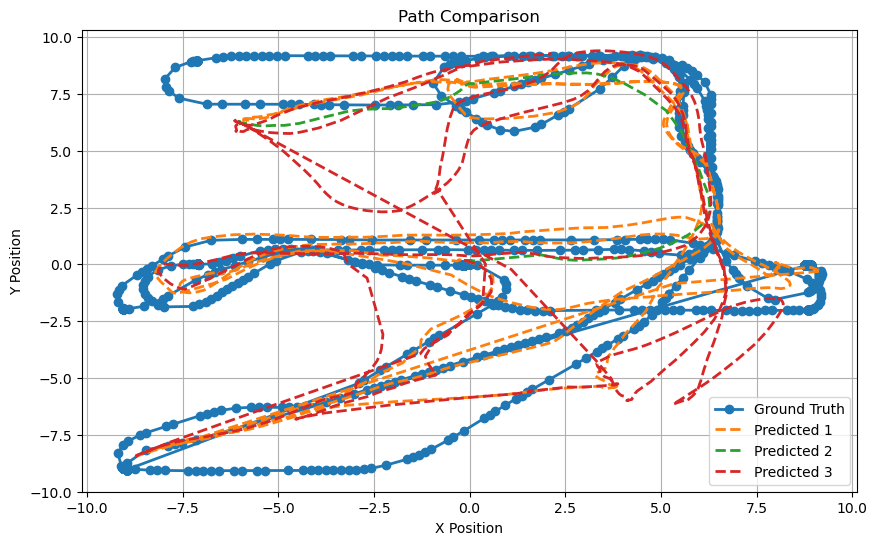

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from the CSV file
def load_csv(file_path):
    return pd.read_csv(file_path)

# Plot paths
def plot_paths(data_list, labels):
    plt.figure(figsize=(10, 6))
    
    # Extract and plot ground truth from the first dataset
    ground_truth_x = data_list[0]['actual_x']
    ground_truth_y = data_list[0]['actual_y']
    plt.plot(ground_truth_x, ground_truth_y, label="Ground Truth", linewidth=2, linestyle='-', marker='o')
    
    # Plot predictions from each file
    for i, data in enumerate(data_list):
        predicted_x = data['predicted_x']
        predicted_y = data['predicted_y']
        plt.plot(predicted_x, predicted_y, label=labels[i], linewidth=2, linestyle='--')
    
    # Plot settings
    plt.title("Path Comparison")
    plt.xlabel("X Position")
    plt.ylabel("Y Position")
    plt.legend()
    plt.grid(True)
    plt.show()

# File paths for the prediction files
file_paths = ["predictions_1.csv", "predictions_2.csv", "predictions_3.csv"]#, "predictions_4.csv"]
labels = ["Predicted 1", "Predicted 2", "Predicted 3"] #, "Predicted 4"]

# Load data from all files
data_list = [load_csv(file_path) for file_path in file_paths]

# Plot paths
plot_paths(data_list, labels)


Predicted 1 Errors:
  Position MAE: 0.8791, Position RMSE: 1.0388
  Orientation MAE: 2.1085, Orientation RMSE: 2.1324
Predicted 2 Errors:
  Position MAE: 2.9224, Position RMSE: 2.9390
  Orientation MAE: 1.9244, Orientation RMSE: 1.9274
Predicted 3 Errors:
  Position MAE: 1.7626, Position RMSE: 2.4174
  Orientation MAE: 2.4941, Orientation RMSE: 2.5396


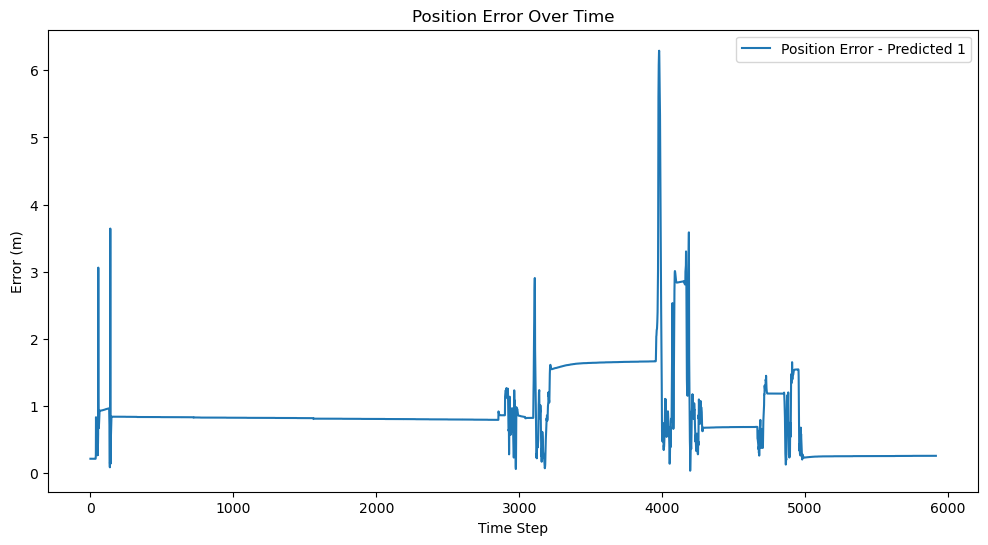

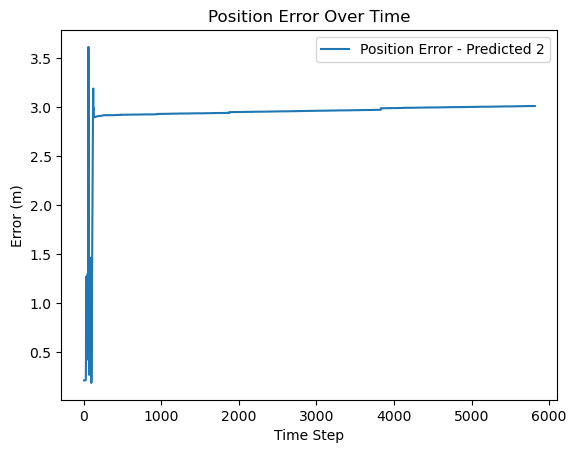

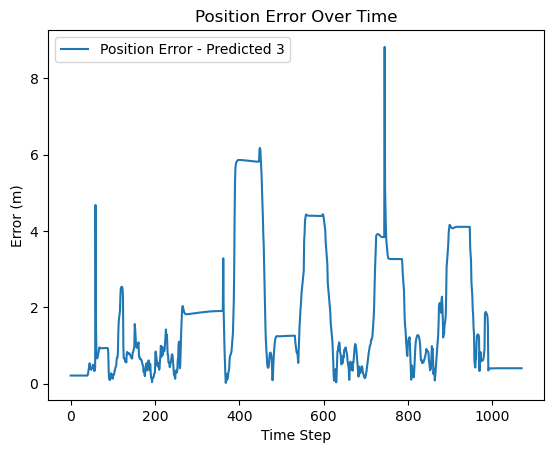

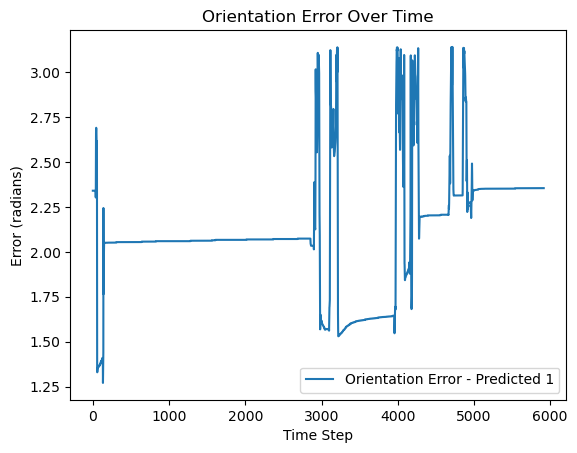

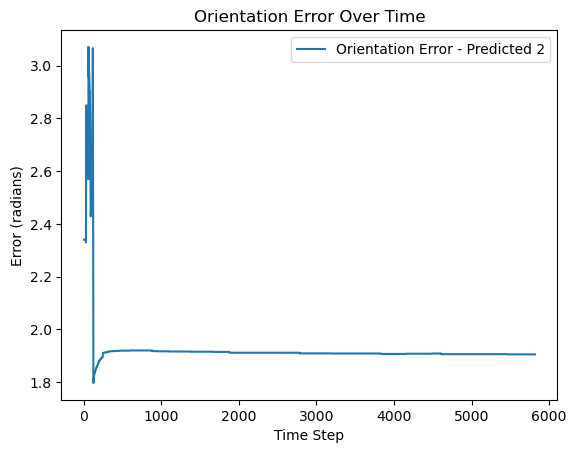

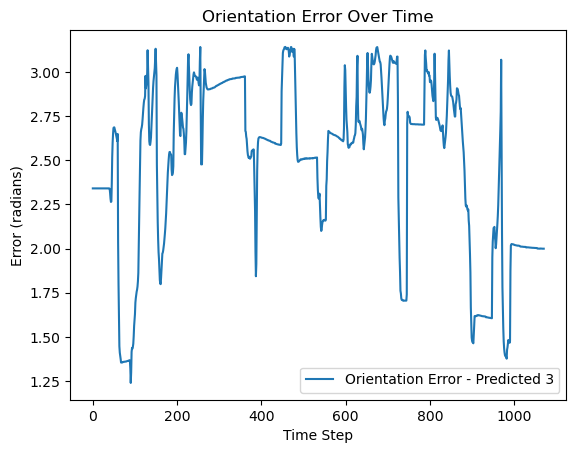

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R

# Function to calculate Euclidean distance error
def calculate_position_error(data):
    return np.sqrt(
        (data['actual_x'] - data['predicted_x'])**2 +
        (data['actual_y'] - data['predicted_y'])**2
    )

# Function to calculate orientation error
def calculate_orientation_error(data):
    errors = []
    for i in range(len(data)):
        # Ground truth quaternion
        q_gt = [
            data.iloc[i]['actual_qx'],
            data.iloc[i]['actual_qy'],
            data.iloc[i]['actual_qz'],
            data.iloc[i]['actual_qw']
        ]
        # Predicted quaternion
        q_pred = [
            data.iloc[i]['predicted_qx'],
            data.iloc[i]['predicted_qy'],
            data.iloc[i]['predicted_qz'],
            data.iloc[i]['predicted_qw']
        ]
        # Compute dot product and orientation error
        dot_product = np.abs(np.dot(q_gt, q_pred))
        error = 2 * np.arccos(np.clip(dot_product, -1.0, 1.0))
        errors.append(error)
    return np.array(errors)

# Statistical metrics
def compute_metrics(errors):
    mae = np.mean(np.abs(errors))
    rmse = np.sqrt(np.mean(errors**2))
    return mae, rmse

# # File paths for the prediction files
# file_paths = ["predictions_1.csv", "predictions_2.csv", "predictions_3.csv", "predictions_4.csv"]
# labels = ["Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4"]

# Initialize lists for storing errors
all_position_errors = []
all_orientation_errors = []
metrics = []

# Compute errors and metrics for each dataset
for file_path in file_paths:
    data = pd.read_csv(file_path)

    # Compute position and orientation errors
    position_error = calculate_position_error(data)
    orientation_error = calculate_orientation_error(data)

    # Store errors for plotting
    all_position_errors.append(position_error)
    all_orientation_errors.append(orientation_error)

    # Compute metrics
    position_mae, position_rmse = compute_metrics(position_error)
    orientation_mae, orientation_rmse = compute_metrics(orientation_error)

    metrics.append({
        "Position MAE": position_mae,
        "Position RMSE": position_rmse,
        "Orientation MAE": orientation_mae,
        "Orientation RMSE": orientation_rmse
    })

# Print metrics for each dataset
for i, label in enumerate(labels):
    print(f"{label} Errors:")
    print(f"  Position MAE: {metrics[i]['Position MAE']:.4f}, Position RMSE: {metrics[i]['Position RMSE']:.4f}")
    print(f"  Orientation MAE: {metrics[i]['Orientation MAE']:.4f}, Orientation RMSE: {metrics[i]['Orientation RMSE']:.4f}")

# Plot errors
plt.figure(figsize=(12, 6))

# Plot position errors
for i, position_error in enumerate(all_position_errors):
    plt.plot(position_error, label=f"Position Error - {labels[i]}")
    plt.title("Position Error Over Time")
    plt.xlabel("Time Step")
    plt.ylabel("Error (m)")
    plt.legend()
    
    plt.show()

# Plot orientation errors
for i, orientation_error in enumerate(all_orientation_errors):
    plt.plot(orientation_error, label=f"Orientation Error - {labels[i]}")
    plt.title("Orientation Error Over Time")
    plt.xlabel("Time Step")
    plt.ylabel("Error (radians)")
    plt.legend()

    plt.show()


In [18]:
import os

# Get the current working directory
cwd = os.getcwd()

# Print the current working directory
print("Current working directory:", cwd)



Current working directory: C:\Users\herbe\Documents\1-M-AI\WS2024\Robotics\Herberrt
